In [ ]:
from alarm_data_type import alarm_dict
print(alarm_dict.level['紧急'])

1


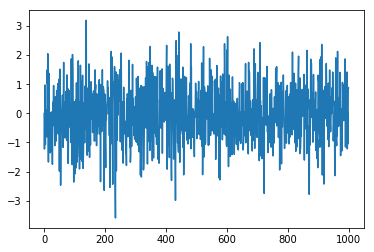

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.Series(np.random.randn(1000), index=np.arange(1000))
data.cumsum()
data.plot()
plt.show()

In [2]:
import pandas as pd
from alarm_data_type import alarm_dict

filename = 'raw_data.xls'
table = pd.read_excel(filename, sheet_name=0, header=0)
datas = []
for i in range(len(table)):
    data = []
    data.append(alarm_dict.level[table.iloc[i].values[0]])
    data.append(alarm_dict.event[table.iloc[i].values[1]])
    data.append(alarm_dict.alarm_source[table.iloc[i].values[2]])
    data.append(alarm_dict.location[table.iloc[i].values[3]])
    data.append(alarm_dict.occur_time[table.iloc[i].values[4]])
#     print(data)
    datas.append(data)
# print(datas)

In [23]:
print(len(table))

1125


In [67]:
import tensorflow as tf
import numpy as np
input_data = tf.Variable(np.random.rand(2,5,1), dtype=np.float32)
print(np.random.rand(2,5,1))
filter_data = tf.Variable(np.random.rand(2,1,2), dtype=np.float32)
y = tf.nn.conv1d(input_data, filter_data, stride=1, padding='SAME')
print('conv1d:', y)

[[[ 0.69887422]
  [ 0.34230285]
  [ 0.22699425]
  [ 0.77393578]
  [ 0.74112258]]

 [[ 0.43438026]
  [ 0.13411872]
  [ 0.80636242]
  [ 0.06361837]
  [ 0.17906289]]]
conv1d: Tensor("conv1d_21/Squeeze:0", shape=(2, 5, 2), dtype=float32)


In [123]:
import tensorflow as tf
import numpy as np
import data_process

# print(data_process.datas)
input_data = data_process.data
# print(np.array(input_data).shape)
input_data1=np.resize(input_data, (1, 5, 1))
# input1 = input_data1[0:1, :]
print(input_data1)
# print(np.array(input_data).shape)

input_datas = tf.cast(input1, tf.float32) 
# print(input_datas.shape)

filter_data = tf.Variable(np.random.rand( 2, 1, 10), dtype=np.float32)
y = tf.nn.conv1d(input_datas, filter_data, stride=1, padding='SAME')
h = tf.nn.relu(y)
print('conv1d:', h)
filter2 = tf.Variable(np.random.rand( 2, 10, 6), dtype=np.float32)
y2 = tf.nn.conv1d(h, filter2, stride=1, padding='SAME')
h2 = tf.nn.relu(y2)
print('conv1d:', h2)
w = tf.Variable(np.random.rand(3 *6, 10), dtype=np.float32)
h3 = tf.nn.relu(tf.matmul(h2, w) )
print(h3)

[[[  2]
  [  6]
  [ 31]
  [133]
  [640]]]


ValueError: Shape must be rank 4 but is rank 3 for 'conv1d_72/Conv2D' (op: 'Conv2D') with input shapes: [1,1,1], [1,2,1,10].

In [96]:
a = [[1,2],[2,34],[3,45]]
print(a)
print(np.array(a).shape)
b=np.resize(a,(3,2,1))
print(b)
print(np.array(b).shape)

[[1, 2], [2, 34], [3, 45]]
(3, 2)
[[[ 1]
  [ 2]]

 [[ 2]
  [34]]

 [[ 3]
  [45]]]
(3, 2, 1)


In [99]:
np.random.rand(2)

array([ 0.78339257,  0.66187312])

SyntaxError: invalid syntax (<ipython-input-107-6fb51ac8c064>, line 1)

In [44]:
import tensorflow as tf
import numpy as np
import data_process
from generateData import Utils

# 定义函数
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variables(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv1d(x, W):
    return tf.nn.conv1d(x, W, stride=1, padding='SAME')

# def max_pooling_22(x):
#     return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 1. 数据导入
data = data_process.datas
# input_data1 = np.resize(input_datas, (1125, 5, 1))
datas = tf.cast(data, tf.float32)
# input_data = np.array(datas)
xs = datas[:, 0:5]
ys = datas[:, 5]
sess = tf.InteractiveSession()
xs_ = sess.run(xs)
ys_ = sess.run(ys)

# datas = []
# test1 = Utils()
# for i in range(500):
#     datas.append(test1.generateData(False))
# for i in range(10000):
#     datas.append(test1.generateData(True))
# # input_data = np.array(datas)
# listData = []
# for i in range(len(datas)):
#     listData.append([datas[i].nodeS, datas[i].nodeD, datas[i].bandwidth, datas[i].delay,
#                     datas[i].loss, datas[i].flag])
# toMatrix = np.mat(listData)
# # print(toMatrix)
# xs_ = toMatrix[:, 0:5]
# ys_ = toMatrix[:, 5]
# sess = tf.InteractiveSession()

# y_actual = tf.random_normal_initializer

# 2.第一层卷积
# 参数
W_conv1 = weight_variable([1, 1, 10])
b_conv1 = bias_variables([10])
x = tf.placeholder(tf.float32, [None, 5])
x_data = tf.reshape(x, [-1, 5, 1])
h_conv1 = tf.nn.relu(conv1d(x_data, W_conv1) + b_conv1)

# 3.第二层卷积
W_conv2 = weight_variable([2, 10, 8])
b_conv2 = bias_variables([8])
# 激活函数
h_conv2 = tf.nn.relu(conv1d(h_conv1, W_conv2) + b_conv2)
h_conv3 = tf.reshape(h_conv2, [-1, 40])

# 4.全连接层
W_fc1 = weight_variable([40, 10])
b_fc1 = bias_variables([10])
h_fc1 = tf.nn.relu(tf.matmul(h_conv3, W_fc1) + b_fc1)

# 5.dropout层
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 6.输出层
W_fc2 = weight_variable([10, 1])
b_fc2 = bias_variables([1])
y_predict = tf.nn.relu(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
y_ = tf.placeholder(tf.float32)

# 交叉熵
cross_entropy = -tf.reduce_sum(y_*tf.log(y_predict))
train_step = tf.train.GradientDescentOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_predict, 0), tf.argmax(y_, 0))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i in range(1000):
    sess.run(train_step, feed_dict={x: xs_, y_: ys_, keep_prob : 1.0})
    y_array = sess.run(y_predict,  feed_dict={x: xs_, y_: ys_, keep_prob : 1.0})
    for j in range(y_array.shape[0]):
        for k in range(y_array.shape[1]):
            if 
#     print(sess.run(y_predict,  feed_dict={x: xs_, y_: ys_, keep_prob : 1.0}))

    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x: xs_, y_: ys_, keep_prob : 1.0})
        
#         print(sess.run(y_predict, feed_dict={x: xs_, y_: ys_, keep_prob : 1.0}))
#         print(sess.run(h_conv1, feed_dict={x: xs_, y_: ys_, keep_prob : 1.0}))
#         print(sess.run(h_conv1, feed_dict={x: xs_, y_: ys_, keep_prob : 1.0}))
#         print(sess.run(cross_entropy))
        print('step %d, training accuracy %g' %(i, train_accuracy))
#     sess.run(train_step, feed_dict={x: xs_, y_: ys_, keep_prob : 1.0})


[[ 0.24722061]
 [ 0.25557071]
 [ 0.2590476 ]
 ..., 
 [ 0.11420187]
 [ 0.09972201]
 [ 0.09130475]]
step 0, training accuracy 0
[[ 0.24722061]
 [ 0.25557071]
 [ 0.2590476 ]
 ..., 
 [ 0.11420187]
 [ 0.09972201]
 [ 0.09130475]]
[[ 0.24722061]
 [ 0.25557071]
 [ 0.2590476 ]
 ..., 
 [ 0.11420187]
 [ 0.09972201]
 [ 0.09130475]]
[[ 0.24722061]
 [ 0.25557071]
 [ 0.2590476 ]
 ..., 
 [ 0.11420187]
 [ 0.09972201]
 [ 0.09130475]]
[[ 0.24722061]
 [ 0.25557071]
 [ 0.2590476 ]
 ..., 
 [ 0.11420187]
 [ 0.09972201]
 [ 0.09130475]]
[[ 0.24722061]
 [ 0.25557071]
 [ 0.2590476 ]
 ..., 
 [ 0.11420187]
 [ 0.09972201]
 [ 0.09130475]]
[[ 0.24722061]
 [ 0.25557071]
 [ 0.2590476 ]
 ..., 
 [ 0.11420187]
 [ 0.09972201]
 [ 0.09130475]]
[[ 0.24722061]
 [ 0.25557071]
 [ 0.2590476 ]
 ..., 
 [ 0.11420187]
 [ 0.09972201]
 [ 0.09130475]]


KeyboardInterrupt: 

In [ ]:
import numpy as np
import tensorflow as tf
import data_process
datas = data_process.datas
# input_data1 = np.resize(input_datas, (1125, 5, 1))
datas = tf.cast(datas, tf.float32)
xs = datas[:, 0:5]
ys = data

In [39]:
import tensorflow as tf
import numpy as np
a = tf.random_normal(shape=[3,4],mean=0, stddev=1, dtype=tf.float32, seed=None, name=None)
sess=tf.InteractiveSession()
# sess.run(tf.initiablize_all_variables())
b=tf.argmax(input=a,axis=0)
c=tf.argmax(input=a,axis=1)
print(sess.run(a))
print(sess.run(b))
print(sess.run(c))

[[-0.47427496  1.147385   -1.12000871  0.04385659]
 [-0.51600599  0.84535235  0.46443179  0.66040236]
 [-0.3827998  -1.0683347  -0.28260228  0.60954219]]
[1 2 2 0]
[0 3 3]


In [17]:
from __future__ import print_function
import torch
# x=torch.Tensor(5,3)
x=torch.rand(5,3)
x
# x.size


 0.2665  0.2641  0.0962
 0.5102  0.4046  0.7861
 0.6606  0.0716  0.0233
 0.2446  0.1740  0.5167
 0.5229  0.5888  0.2931
[torch.FloatTensor of size 5x3]

In [30]:
from torch.autograd import Variable
x = Variable(torch.ones(2,2), requires_grad=True)
# x.creator
y=x+2
# Variable(y).creator

# y.creator

In [31]:
z=y*y*3
out=z.mean()
out

Variable containing:
 27
[torch.FloatTensor of size 1]

In [32]:
out.backward()
x.grad

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]

In [41]:
x=torch.randn(3)
x=Variable(x,requires_grad=True)
y=x*2
y
y.data


-3.1782
 3.6398
-0.2337
[torch.FloatTensor of size 3]

### input--->conv2d--->relu--->maxpool2d--->conv2d--->relu--->maxpool2d--->view--->linear--->relu--->linear---MSEloss--->loss


In [98]:
import torch.nn as nn
import torch
import torch.nn.functional as F
conv1 = nn.Conv2d(1, 6, 5)
conv2=nn.Conv2d(6,16,5)
fc1=nn.Linear(400, 120)
fc2=nn.Linear(120,10)
x = torch.autograd.Variable(torch.Tensor(1, 1, 32, 32))
y = conv1(x)
y= F.max_pool2d(F.relu(y),2)
y=conv2(y)
y=F.max_pool2d(F.relu(y),2)
s=y.size()[1:]
j=1
for i in s:
    j *= i
print(j)
y=y.view(-1,j)
print(y.size())
y=fc1(y)
y=F.relu(y)
y=fc2(F.relu(y))
print(y.size())
# print(z.size())

400
torch.Size([1, 400])
torch.Size([1, 10])


In [100]:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 不包括激活函数
        self.conv1=nn.Conv2d(1, 6, 5)  # 1---输入信号的通道  6---卷积产生的通道  5---卷积核尺寸(5*5)
        self.conv2=nn.Conv2d(6,16,5)
        # 三个全连接层
        self.fc1=nn.Linear(16*5*5, 120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
        
    def forward(self,x):
        # Nx1x32x32  --> 
        x=F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x=F.max_pool2d(F.relu(self.conv2(x)), 2)
        x=x.view(-1,self.num_flat_features(x))
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
#     num_flat_features(x)：计算张量x的总特征量，如x是4*2*2的张量，那么它的特征总量就是16
    def num_flat_features(self,x):
        size=x.size()[1:]  # pytorch只接受批输入，[1:]把注意力放在3维上面
        num_features=1
        for s in size:
            num_features *= s
        return num_features
net=Net()
net

# 训练参数的数量
print(net)
params=list(net.parameters())
# print(params)
print(len(params))

Net(
  (conv1): Conv2d (1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)
10


In [101]:
input=Variable(torch.randn(1,1,32,32)) # （NCHW）
input
out=net(input)
out

Variable containing:
 0.1235 -0.0281  0.0672  0.0616  0.0315  0.0654  0.0246  0.0878  0.0743 -0.0531
[torch.FloatTensor of size 1x10]

In [102]:
target=Variable(torch.range(1,10))
criterion=nn.MSELoss()
loss=criterion(out, target)
loss

/home/template/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.3. Note that arange generates values in [start; end), not [start; end].
  """Entry point for launching an IPython kernel.


Variable containing:
 38.0893
[torch.FloatTensor of size 1]

In [67]:
net.zero_grad() # 归零操作
print(net.conv1.bias.grad)
loss.backward(retain_graph=True)
print(net.conv1.bias.grad)

Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

Variable containing:
1.00000e-02 *
  6.6139
 -9.2844
 -2.5006
  7.4986
 -0.6702
  4.7689
[torch.FloatTensor of size 6]



In [78]:
help(torch.nn.Conv2d)

Help on class Conv2d in module torch.nn.modules.conv:

class Conv2d(_ConvNd)
 |  Applies a 2D convolution over an input signal composed of several input
 |  planes.
 |  
 |  In the simplest case, the output value of the layer with input size
 |  :math:`(N, C_{in}, H, W)` and output :math:`(N, C_{out}, H_{out}, W_{out})`
 |  can be precisely described as:
 |  
 |  .. math::
 |  
 |      \begin{array}{ll}
 |      out(N_i, C_{out_j})  = bias(C_{out_j})
 |                     + \sum_{{k}=0}^{C_{in}-1} weight(C_{out_j}, k)  \star input(N_i, k)
 |      \end{array}
 |  
 |  where :math:`\star` is the valid 2D `cross-correlation`_ operator
 |  
 |  | :attr:`stride` controls the stride for the cross-correlation, a single
 |    number or a tuple.
 |  | :attr:`padding` controls the amount of implicit zero-paddings on both
 |  |  sides for :attr:`padding` number of points for each dimension.
 |  | :attr:`dilation` controls the spacing between the kernel points; also
 |    known as the à trous algo

$$H_{out}